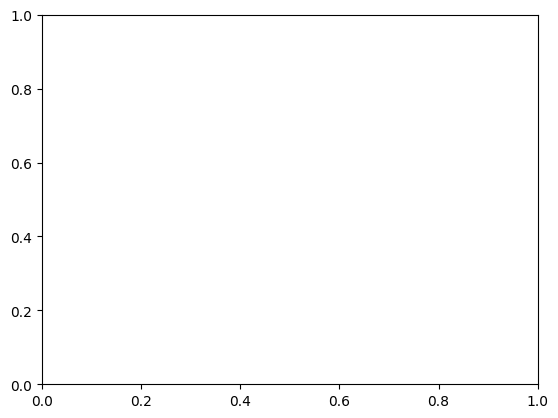

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10 * np.pi, 1000)
radius = np.linspace(0, 2, 1000)[:,None]
data = np.stack((np.cos(t), np.sin(t)), axis=1) * radius

fig, ax = plt.subplots()
# plt.scatter(data[:,0], data[:,1], c=t)
# plt.colorbar()
# plt.show()

In [2]:
def noisify(data, variance=1):
    noise = np.random.normal(0, np.sqrt(variance), size=data.shape)
    noisy_data = data + noise
    return noisy_data

In [25]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def animate(data, t_max=1, lim=4):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes([0.1, 0.2, 0.8, 0.65])
    slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    slider = Slider(slider_ax,'t', 0, t_max, valinit=0)

    plt.axes(ax)
    plot = plt.scatter(data[:,0], data[:,1], c=t)

    def update(a):
        plot.set_offsets(noisify(data, a, t_max))
        fig.canvas.draw_idle()    
        
    slider.on_changed(update)
    plt.colorbar()
    plt.show()

In [26]:
def noisify_step(data, beta=1):
    noise = np.random.normal(0, np.sqrt(beta), size=data.shape)
    noisy_data = data*np.sqrt(1-beta) + noise
    return noisy_data

def noisify(data, t=0, steps=1000):
    betas = np.linspace(0,  1, steps)
    for t in range(0,int(t)):
        data = noisify_step(data, betas[t])
    return data

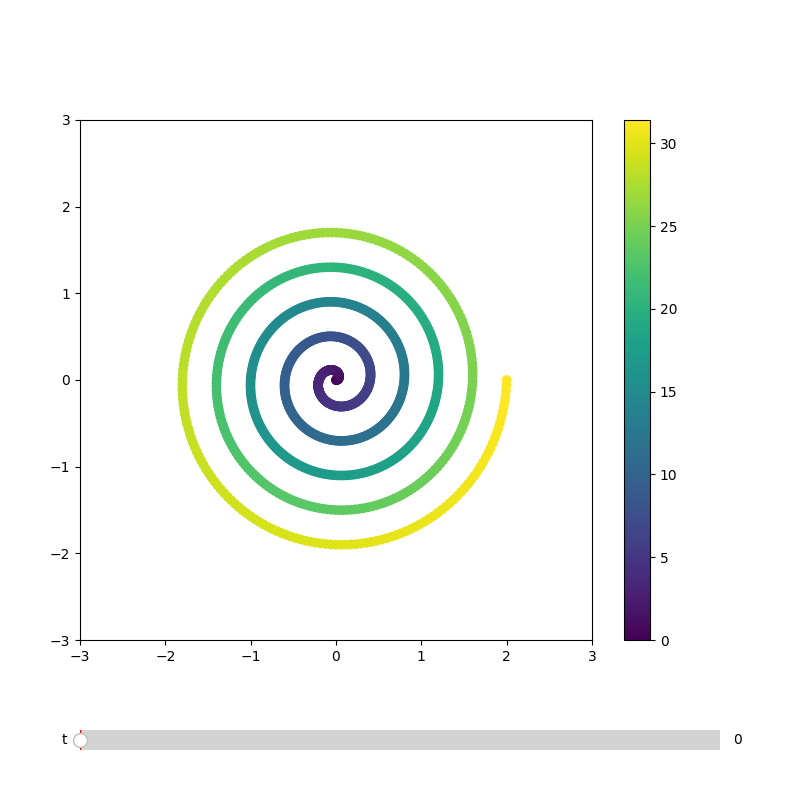

In [29]:
%matplotlib widget

t = np.linspace(0, 10 * np.pi, 1000)
radius = np.linspace(0, 2, 1000)[:,None]
data = np.stack((np.cos(t), np.sin(t)), axis=1) * radius
animate(data,10000,lim=3)